In [5]:
#define simple dataset
def createDataSet():  
    dataSet = [[1,1,'yes'],  
       [1,1,'yes'],  
       [1,0,'no'],  
       [0,1,'no'],  
       [0,1,'no']]  
    labels = ['no child','man']  
    return dataSet, labels  

In [6]:
#calculate entropy
from math import log  
import operator  
def calcShannonEnt(dataSet):  
    numEntries = len(dataSet)  
    labelCounts = {}  
    for featVec in dataSet:  
        currentLabel = featVec[-1]  
        if currentLabel not in labelCounts.keys():  
            labelCounts[currentLabel] = 0  
        labelCounts[currentLabel] += 1 
        #else:  
         #   labelCounts[currentLabel] += 1
    shannonEnt = 0.0  
    for key in labelCounts:  
        #print(key)  
        #print(labelCounts[key])  
        prob = float(labelCounts[key])/numEntries  
        #print(prob)  
        shannonEnt -= prob * log(prob,2) 
    return shannonEnt  

In [7]:
myDat,labels=createDataSet()  
myDat 

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [8]:
calcShannonEnt(myDat) 
# -2/5log2/5-3/5log3/5=0.971

0.9709505944546686

In [9]:
def splitDataSet(dataSet, axis, value):  
    retDataSet = []  
    for featVec in dataSet:  
        if featVec[axis] == value:  
            reducedFeatVec = featVec[:axis]  
            reducedFeatVec.extend(featVec[axis+1:])  
            retDataSet.append(reducedFeatVec)  
    #print(retDataSet)  
    return retDataSet  

In [10]:
splitDataSet(myDat,0,1)  

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [11]:
splitDataSet(myDat,0,0) 

[[1, 'no'], [1, 'no']]

In [12]:
#calculate best feature 
def chooseBestFeatureToSplit(dataSet):  
    numFeatures = len(dataSet[0]) - 1  
    baseEntropy = calcShannonEnt(dataSet)  #baseEntropy
    bestInfoGain = 0.0;bestFeature = -1  
    for i in range(numFeatures):  
        featList = [example[i] for example in dataSet]  
        uniqueVals = set(featList)  
        newEntropy = 0.0  
        for value in uniqueVals:   #every value
            subDataSet = splitDataSet(dataSet, i ,value)  
            prob = len(subDataSet)/float(len(dataSet))  
            newEntropy = prob * calcShannonEnt(subDataSet)  
        infoGain = baseEntropy - newEntropy  # IG
        #print(infoGain)  
        if(infoGain > bestInfoGain):  
            bestInfoGain = infoGain  
            bestFeature = i  
    return bestFeature  

In [13]:
myDat,labels=createDataSet() 
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [14]:
labels

['no surfacing', 'flippers']

In [15]:
chooseBestFeatureToSplit(myDat)

0

In [16]:
def majorityCnt(classList):  
    classCount = {}  
    for vote in classList:  
        if vote not in classCount.keys():classCount[vote] = 0  
        classCount[vote] += 1  
    sortedClassCount  = sorted(classCount.iteritems(),key=operator.itemgetter(1), reverse=True)  
    return sortedClassCount[0][0]  

In [17]:
def createTree(dataSet,labels):  
    classList = [example[-1] for example in dataSet]#将最后一行的数据放到classList中  
    if classList.count(classList[0]) == len(classList):  
        return classList[0]  
    if len(dataSet[0]) == 1:#这里为什么是1呢？就是说特征数为1的时候  
        return majorityCnt(classList)#就返回这个特征就行了，因为就这一个特征  
    bestFeat = chooseBestFeatureToSplit(dataSet)  
    print(bestFeat)  
    bestFeatLabel = labels[bestFeat]#运行结果'no surfacing'  
    myTree = {bestFeatLabel:{}}#运行结果{'no surfacing': {}}  
    del(labels[bestFeat])  
    featValues = [example[bestFeat] for example in dataSet]#第0个特征值  
    uniqueVals = set(featValues)  
    for value in uniqueVals:  
        subLabels = labels[:]  
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value),subLabels)  

    return myTree  

In [18]:
myDat,labels = createDataSet() 

In [19]:
myTree = createTree(myDat,labels) 

0
0


In [20]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [21]:
def getNumLeafs(myTree):  
    numLeafs = 0  
    #firstStr = myTree.keys()[0]  
    firstStr = list(myTree)[0] 
    secondDict = myTree[firstStr]  
    for key in secondDict.keys():  
        if type(secondDict[key]).__name__=='dict':
            numLeafs +=getNumLeafs(secondDict[key])  
        else:  
            numLeafs += 1  
    return numLeafs  

#树的层数  
def getTreeDepth(myTree):  
    maxDepth = 0  
    firstStr = list(myTree)[0]  
    secondDict = myTree[firstStr]  
    for key in secondDict.keys():  
        if type(secondDict[key]).__name__ == 'dict':  
            thisDepth = 1 + getTreeDepth(secondDict[key])  
            #print(123)  
        else:  
            thisDepth = 1  
            #print(456)  
        if thisDepth > maxDepth: maxDepth = thisDepth  
    return maxDepth  

In [22]:
#函数retrieveTree输出预先存储的树信息  
#避免每次测试代码时都要从数据中创建树的麻烦  
def retrieveTree(i):  
    listOfTrees = [{'no child':{0:'no',1:{'man':{0:'no',1:'yes'}}}},  
                   {'no child':{0:'no',1:{'woman':{0:{'head':{0:'no',1:'yes'}},1:'no'}}}}  
                   ]  
    return listOfTrees[i]  

In [23]:
# -*- coding: cp936 -*-  
import matplotlib.pyplot as plt  
decisionNode = dict(boxstyle = "sawtooth",fc="0.8")  
leafNode = dict(boxstyle="round4",fc="0.8")  
arrow_args = dict(arrowstyle="<-")  
  
def plotNode(nodeTxt,centerPt,parentPt,nodeType):  
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords = 'axes fraction',xytext=centerPt,textcoords='axes fraction',va="center",ha="center",bbox=nodeType,arrowprops=arrow_args)  

#画二叉树，实现和上面代码相似的功能  
#1、计算父节点和子节点的中间位置  
def plotMidText(cntrPt, parentPt, txtString):  
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]  
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]  
    createPlot.ax1.text(xMid,yMid,txtString)#??  
#绘制树的很多工作都是在这个函数中完成   
def plotTree(myTree,parentPt,nodeTxt):  
    #计算树的宽和高  
    numLeafs = getNumLeafs(myTree)  
    depth = getTreeDepth(myTree)  
    firstStr = list(myTree)[0]  
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)#??  
    plotMidText(cntrPt,parentPt,nodeTxt)  
    plotNode(firstStr, cntrPt, parentPt, decisionNode)  
    secondDict = myTree[firstStr]  
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD  
    for key in secondDict.keys():  
        if type(secondDict[key]).__name__ == 'dict':  
            plotTree(secondDict[key],cntrPt,str(key))  
        else:  
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW  
            plotNode(secondDict[key], (plotTree.xOff,plotTree.yOff), cntrPt, leafNode)  
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))  
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD  

def createPlot(inTree):  
    fig = plt.figure(1, facecolor='white')  
    fig.clf()  
    axprops = dict(xticks=[],yticks=[])  
    createPlot.ax1 = plt.subplot(111,frameon=False, **axprops)  
    plotTree.totalW = float(getNumLeafs(inTree))  
    plotTree.totalD = float(getTreeDepth(inTree))  
    plotTree.xOff = -0.5/plotTree.totalW;plotTree.yOff = 1.0;  
    print(plotTree.xOff,plotTree.yOff)  
    #plotTree.xOff = 1.0;plotTree.yOff = 1.0;  
    plotTree(inTree, (0.5,1.0), '')  
    plt.show()      

In [24]:
myTree=retrieveTree(0)  

-0.16666666666666666 1.0


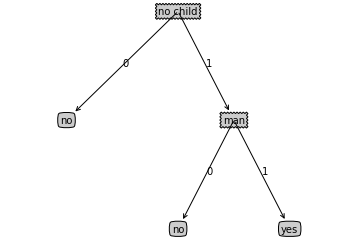

In [25]:
createPlot(myTree) 